In [1]:
## Importing all libraries going to use

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [2]:
#####################################################################################
############################## Question 1 ###########################################
#####################################################################################

## Given : mean and Covariance 

mean1 =[1,0]
cov=[[1,0],[0,1]]
mean2=[0,1]

## Generate 2 two dimensional vectors and they ard i.i.d. to bivariate Normal distribution
m0=np.random.multivariate_normal(mean1, cov, 10)
m1=np.random.multivariate_normal(mean2, cov, 10)

## Generating 2 dataset of 100 datapoint each 

data1=np.random.multivariate_normal(m0[0], [[0.1,0],[0,0.1]], 10)
for i in range(9):
    m=m0[i+1]
    v=[[0.1,0],[0,0.1]]
    temp=np.random.multivariate_normal(m, v, 10)
    data1=np.concatenate((data1, temp), axis=0)
    
data2=np.random.multivariate_normal(m1[0], [[0.1,0],[0,0.1]], 10)
for i in range(9):
    m=m1[i+1]
    v=[[0.1,0],[0,0.1]]
    temp=np.random.multivariate_normal(m, v, 10)
    data2=np.concatenate((data2, temp), axis=0)

## Labeling (+1) and (-1) to first and second dataset respectively

label1=np.ones((100,1))
label2=label1-2
data1=np.concatenate((data1,label1),axis=1)
data2=np.concatenate((data2,label2),axis=1)
data=np.concatenate((data1,data2),axis=0)

Text(0, 0.5, 'y')

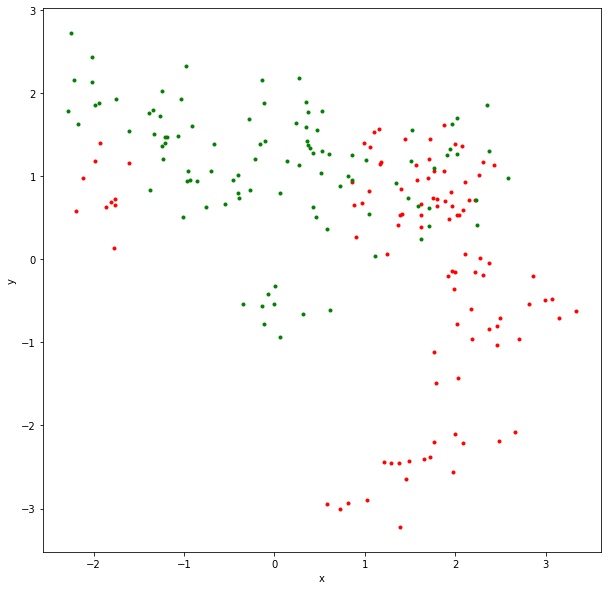

In [3]:
# plot the points
newplt_ = plt.figure(figsize=(10, 10))
plt.plot(data1[:,0], data1[:,1], 'r.') 
plt.plot(data2[:,0], data2[:,1], 'g.')
plt.xlabel("x")
plt.ylabel("y")

In [4]:
## (a) Construct a data set consisting of 200 points the same way as in Q1a,
## assignment 1. (You can use the same code if required.)

## (b) Construct the binary tree using classification tree method, solving
## for the three questions (i.e., which axis, where in the axis, and what
## classification). Use misclassification rule as the loss function.

## function class_error_gain take two partition of data i.e., data1 and data2 as input and return the classification error gain
def class_error_gain(data1,data2):
    c1=data1[data1[:,2]==1].shape[0]
    c2=data1[data1[:,2]==-1].shape[0]
    c3=data2[data2[:,2]==1].shape[0]
    c4=data2[data2[:,2]==-1].shape[0]
    allcerror=(min(c1+c3,c2+c4))/(c1+c2+c3+c4)
    if(c1+c2==0 or c3+c4==0):
        return 0
    lcerror=(min(c1,c2)/(c1+c2))*((c1+c2)/(c1+c2+c3+c4))
    rcerror=(min(c3,c4)/(c3+c4))*((c3+c4)/(c1+c2+c3+c4))
    return allcerror-lcerror-rcerror

# create a list just to store the feature and the splitting value
finaldiv=[]

# function best_split answers the question 'which axis' , 'where in the axis' 
# take a dataset and return a list consist of asked question

def best_split(data):
    xmax=max(data[:,0])-0.2
    xmin=min(data[:,0])+0.2
    ymax=max(data[:,1])-0.2
    ymin=min(data[:,1])+0.2
    x_poss=np.linspace(xmin,xmax,100)
    # take any value which is minimum 
    x_max=-10000
    # best_x variable is to store the best splitting value
    best_x=0
    # divided the axis into 100 parts and check for each partition which has highest classification error gain
    # data1 and data2 are two partitions according to x axis
    for i in x_poss:
        data1=data[data[:,0]<i]
        data2=data[data[:,0]>=i]
        temp_gain=class_error_gain(data1,data2)
        if(x_max<temp_gain):
            x_max=temp_gain
            best_x=i
            
            
    y_poss=np.linspace(ymin,ymax,100)
    # take any value which is minimum
    y_max=-10000
    # best_y variable is to store the best splitting value    
    best_y=0
    # divided the axis into 100 parts and check for each partition which has highest classification error gain
    # data1 and data2 are two partitions according to y axis
    for i in y_poss:
        data1=data[data[:,1]<i]
        data2=data[data[:,1]>=i]
        temp_gain=class_error_gain(data1,data2)
        if(y_max<temp_gain):
            y_max=temp_gain
            best_y=i
            
    
    if(x_max>y_max):
        l1=['x',best_x]
        finaldiv.append(l1)
        xaxis=[best_x,best_x]
        yaxis=[ymin-0.25,ymax+0.25]
        plt.plot(xaxis,yaxis,"r-")
        return l1
    else:
        l2=['y',best_y]
        finaldiv.append(l2)
        xaxis=[xmin-0.25,xmax+0.25]
        yaxis=[best_y,best_y]
        plt.plot(xaxis,yaxis,"b-")        
        return l2

In [5]:
## (c) Grow the tree to a maximum depth of 3. Recall that the depth of
## the tree is the maximum distance of a node from the root node. The
## branch can be stopped either if the misclassification is zero, or if the
## number of points in the rectangle is at most 10.


# function class_tree return the regions 
train_error=[0]



## Construct and Build the binary tree using classification tree method.
## I have done both (b) and (c) in same part.
def class_tree(data,count=0):
    if(count==3 or data.shape[0]<10):
        c1=data[data[:,2]==1].shape[0]
        c2=data[data[:,2]==-1].shape[0]
        train_error[0]=train_error[0]+min(c1,c2)
    
    if(count==4 or data.shape[0]<10 or (data[data[:,2]==1].shape[0]==0 or data[data[:,2]==-1].shape[0]==0)):
        return
    count=count+1
    list1=best_split(data)
    if(list1[0]=='x'):
        data1=data[data[:,0]<list1[1]]
        data2=data[data[:,0]>=list1[1]]
    else:
        data1=data[data[:,1]<list1[1]]
        data2=data[data[:,1]>=list1[1]]
    class_tree(data1,count)
    
    class_tree(data2,count)

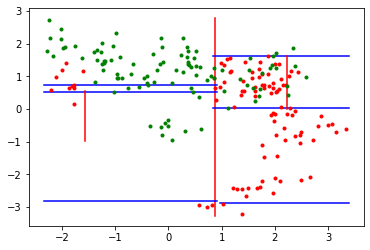

In [6]:
class_tree(data)
plt.plot(data1[:,0], data1[:,1], 'r.') 
plt.plot(data2[:,0], data2[:,1], 'g.')
plt.show()

In [7]:
print("Training error : ",train_error[0]/200)

Training error :  0.19


In [8]:
#####################################################################################
############################## Question 2 ###########################################
#####################################################################################

In [9]:
## Generate 500 data points X1, X2, . . . , X500 ∈ R^10 such that they are i.i.d. ∼ N (0, I10).
## Decide Yi as follows:
## Yi = +1 if ||Xi||2 ≥ 9.34,
##      −1 otherwise.

mean =np.array([0,0,0,0,0,0,0,0,0,0])
cov=np.identity(10)
# noi represent number of iteration 
# tn represent number of data points we have to consider
noi=100
tn=500
## Generate 2 two dimensional vectors and they ard i.i.d. to bivariate Normal distribution
x_train=np.random.multivariate_normal(mean, cov, tn)

In [10]:
# y_train represent the response matrix
y_train=np.ones((tn,1))
for i in range(tn):
    if(np.linalg.norm(x_train[i,:])>=math.sqrt(9.34)):
        y_train[i]=1
    else:
        y_train[i]=-1
        

In [11]:
# function to calculate error
def calculate_error(x,y,w):
    sum1=0
    for i in range(x.shape[0]):
        if(x[i]!=y[i]):
            sum1=sum1+w[i]
    return sum1/sum(w)

In [12]:
# Use a two-terminal classification tree to classify the data, and apply boosting on top of the 
# classification tree. Compute the error each time after applying the boosting algorithm

## First initialize the weight array with value 1/tn.
weight_arr = np.ones(x_train.shape[0]) * 1 / (x_train.shape[0])

# error_list ,weak_classifier, alpha_list are list to store error, classifier after every iteration, alpha value
error_list=[]
weak_classifier=[]
alpha_list=[]

## What I do is for every iteration consider a classifier , here it is Decision Tree Classifier,
## then predict the value for training error and store the error in a list
## and then calculating alpha value and using this alpha value update the weight 
## for misclassified datapoints.
## Repeat these steps noi times.
## Here weak classifier is just a stump
for i in range(noi):
    dtc_model=DecisionTreeClassifier(max_leaf_nodes=2)
    dtc_model.fit(x_train,y_train,sample_weight=weight_arr)
    y_pred=dtc_model.predict(x_train)
    weak_classifier.append(dtc_model)
    error_m=calculate_error(y_train,y_pred,weight_arr)
    error_list.append(error_m)
    alpha=np.log((1-error_m)/error_m)
    alpha_list.append(alpha)
    for j in range(weight_arr.shape[0]):
        temp=1
        if(y_train[j]==y_pred[j]):
            temp=0
        weight_arr[j]=weight_arr[j]*math.exp(alpha*temp)

In [13]:
## then combine this weak classifier
temp_arr=np.zeros(tn)
y_pred=np.zeros(tn)
train_error=np.zeros(noi)
# train_error=[]
for i in range(noi):
    y_pred_temp=weak_classifier[i].predict(x_train)*alpha_list[i]
    temp_arr=temp_arr+y_pred_temp

# y_pred represent the final predicted value by boosting algorithm
    y_pred = np.sign(temp_arr)
    #print(y_pred.shape)
    #print(temp_arr.shape)
    #a=(sum(np.not_equal(y_pred,y_train)))/tn
    #print(a.shape)
    error=0
    for j in range(tn):
        if(y_pred[j]!=y_train[j]):
            error=error+1
    train_error[i]=error/tn


Text(0, 0.5, 'Training error')

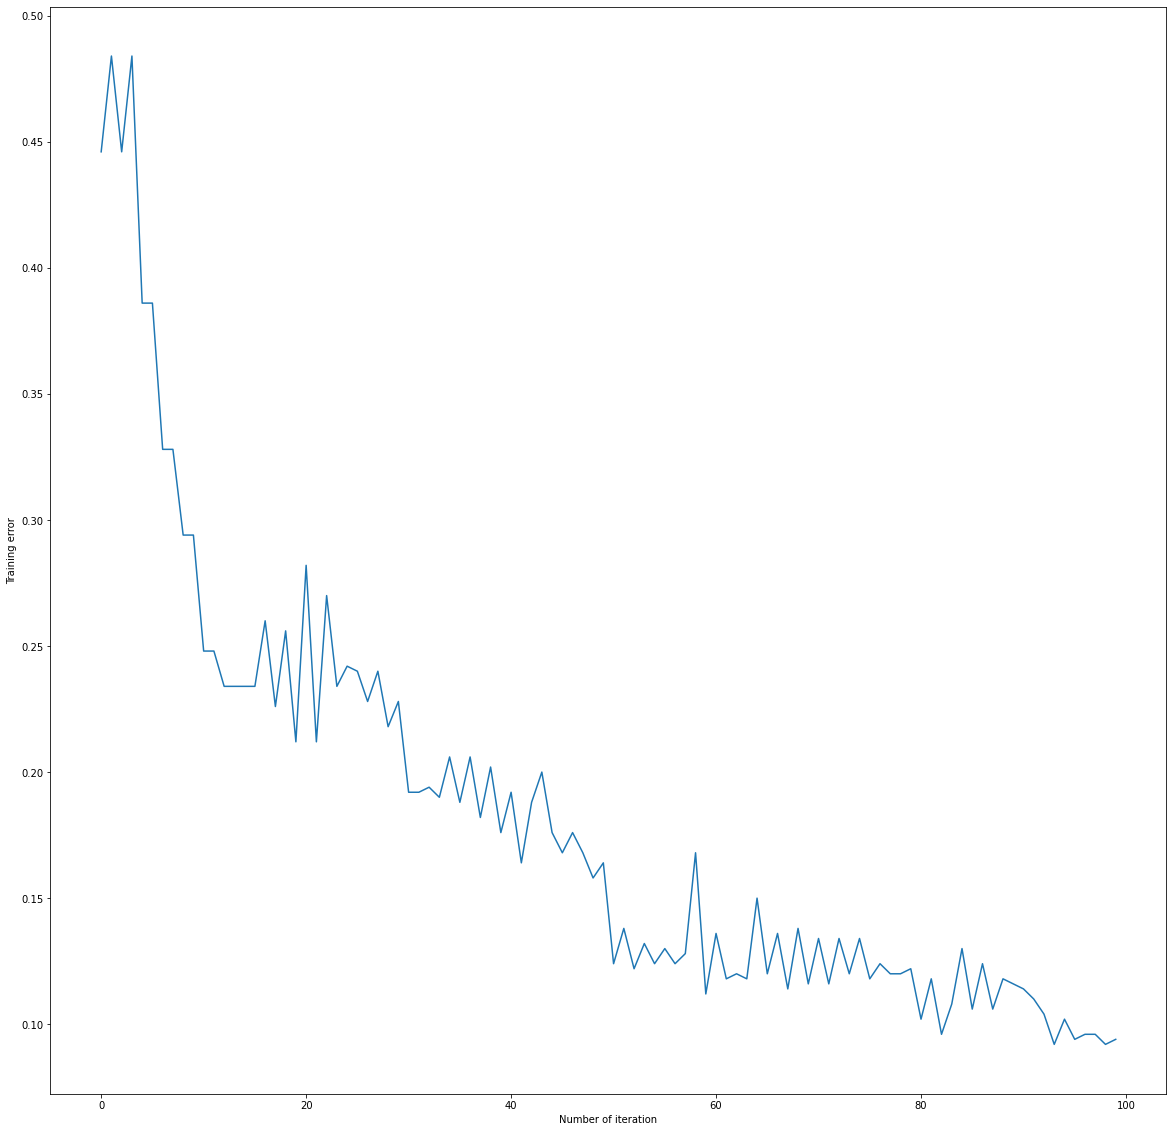

In [14]:
## Plot the training error as a function of the number of iterations the boosting algorithm was applied.
fig = plt.figure(figsize=(20,20))
plt.plot(np.arange(noi),train_error)
plt.xlabel("Number of iteration")
plt.ylabel("Training error")

In [15]:
## print the training error
train_error=0
for i in range(tn):
    if(y_pred[i]!=y_train[i]):
        train_error+=1
print("Training error : ", train_error/tn)

Training error :  0.094


In [16]:
#####################################################################################
############################## Question 3 ###########################################
#####################################################################################

## Consider the sales of car seats given in Carseats.csv file. The first column Sales
## is the dependent variable, and the other columns represent the independent variables.

In [17]:
# import the data

pddata=pd.read_csv("sample_data/Carseats.csv")

In [18]:
## Convert the words in the data as follows:
## Good → 1, Medium → 0, Bad → (−1), Yes → 1, No → 0.

# Replacing the entries as mention above
pddata.replace('Bad',-1,inplace=True)
pddata.replace('Medium',0,inplace=True)
pddata.replace('Good',1,inplace=True)
pddata.replace('Yes',1,inplace=True)
pddata.replace('No',0,inplace=True)

In [19]:
## xx_new is a DataFrame of all independent variables
## yy_new is a DataFrame of dependent variable i.e., first column of data
xx_new=pddata[pddata.columns[2:12]]
yy_new=pddata[pddata.columns[1]]

## (a) Split the data into training and testing data. The training data must
## contain 80% of the randomly selected data points, and the remaining
## data needs to be the test data.

# splitting the data into training data and test data
xx_train, xx_test, yy_train, yy_test = train_test_split(xx_new, yy_new, test_size=0.2)


Test error in Decision Tree Regressor is :  6.309960158938215


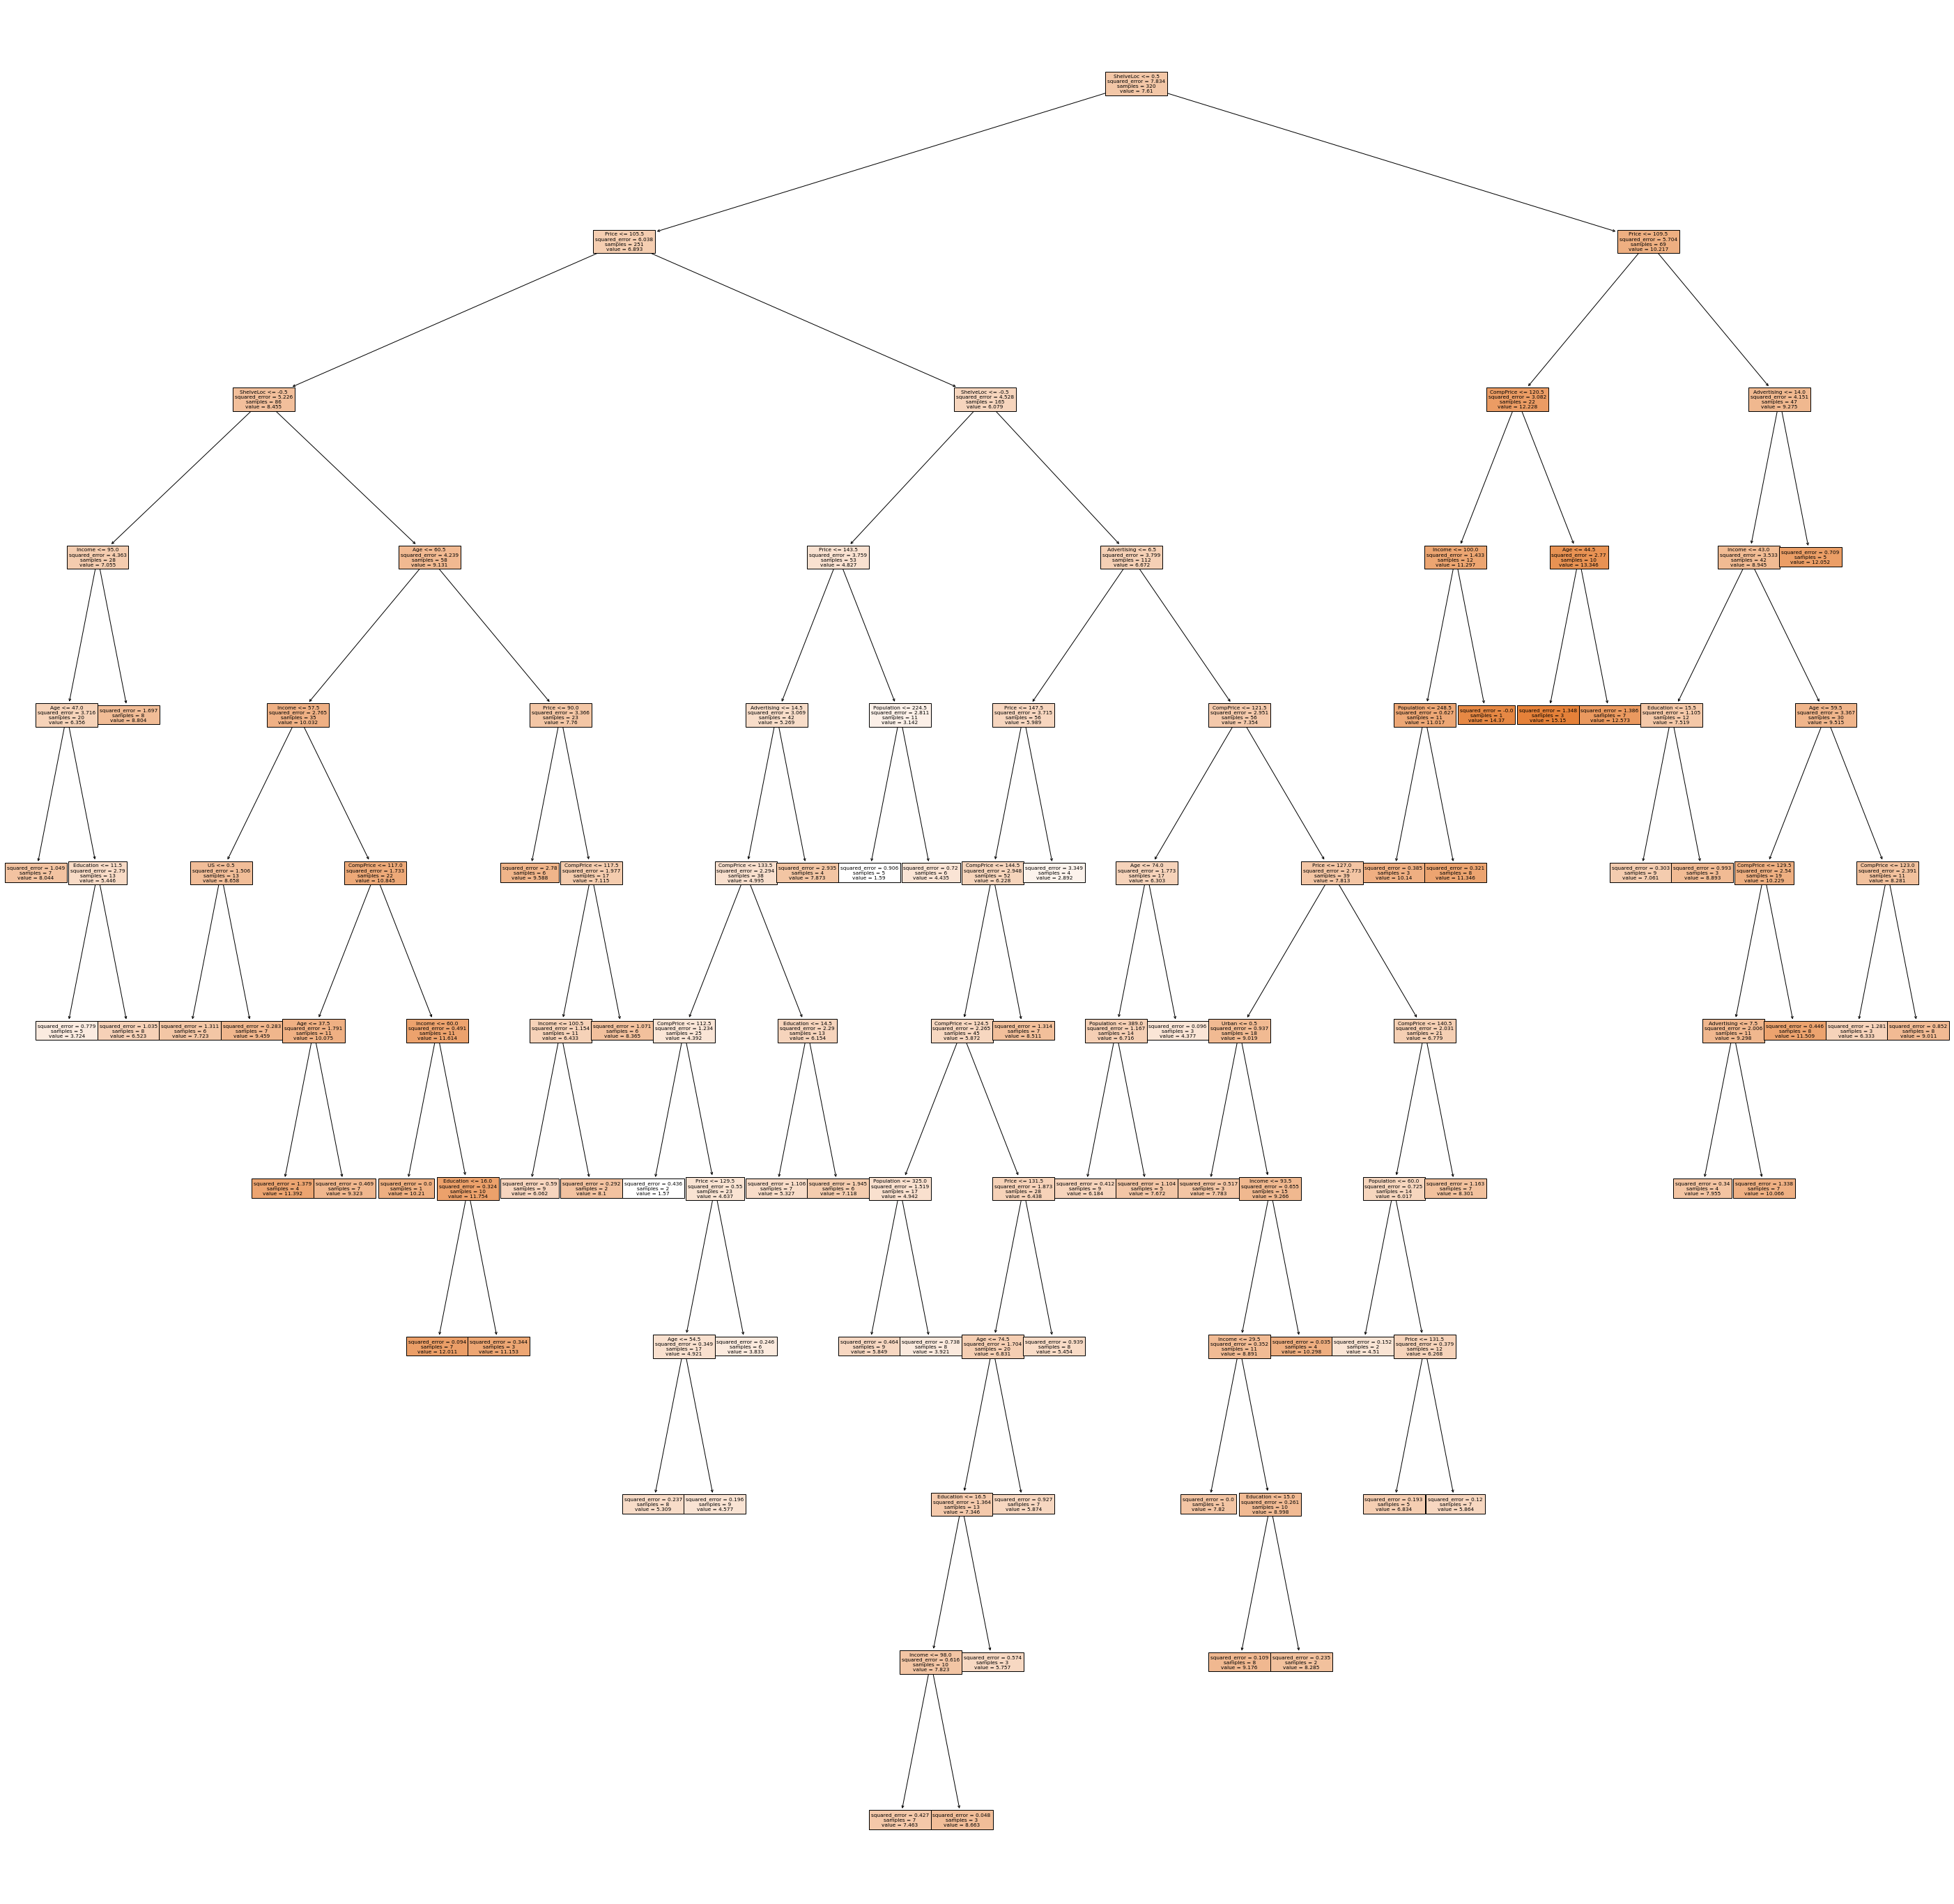

In [20]:
## Construct a binary tree using regression tree method. Use the command 
## DecisionTreeRegressor from sklearn.tree. Do not use maximum
## depth. Split the tree until there are 10 points in each node. Do not
## use pruning. Fit the tree in the training data, and then compute the
## test error in the test data. Print the constructed tree using plot tree
## from sklearn.tree, and also print the test error.

# from sklearn.model_selection importing DecisionTreeRegressor and then fit the 
# training data in that model and then predict the output for test data
DTR_model= DecisionTreeRegressor( min_samples_split=10)
DTR_model.fit(xx_train,yy_train) 
yypred=DTR_model.predict(xx_test)

# Calculating the test error
# There is a direct to calculate Mean squared error using sklearn library 
y_test=np.array(yy_test)
test_error=0
for i in range(80):
    test_error=test_error+(y_test[i]-yypred[i])**2
print("Test error in Decision Tree Regressor is : ",test_error/80)

# Print the constructed tree
fig = plt.figure(figsize=(50,50))
tree.plot_tree(DTR_model, feature_names=pddata.columns[2:12], class_names=pddata.columns[1], filled = True)
plt.show()

In [21]:
## Perform cost-complexity pruning on the tree constructed in part (b).
## Choose the required set of α’s using cost complexity pruning path
## command on the classifier. Pick the value of α that gives the least
## test error, and then compute the test error in the test data. Print
## the tree constructed on the test data, and also print the test error.


path=DTR_model.cost_complexity_pruning_path(xx_train,yy_train)
alpha=path['ccp_alphas']
mini=10000 # This is just a large number we can take any large number
mini_alpha=0
for i in alpha:
    dtr_model=DecisionTreeRegressor( min_samples_split=10,ccp_alpha=i)
    dtr_model.fit(xx_train,yy_train)
    ypred=dtr_model.predict(xx_test)
    test_error=sklearn.metrics.mean_squared_error(yy_test, ypred)
    if(mini>test_error):
        mini=test_error
        mini_alpha=i
        model=dtr_model
print("Test error in the test data after performing cost-complexity pruning : ",mini)

Test error in the test data after performing cost-complexity pruning :  4.888384627165111


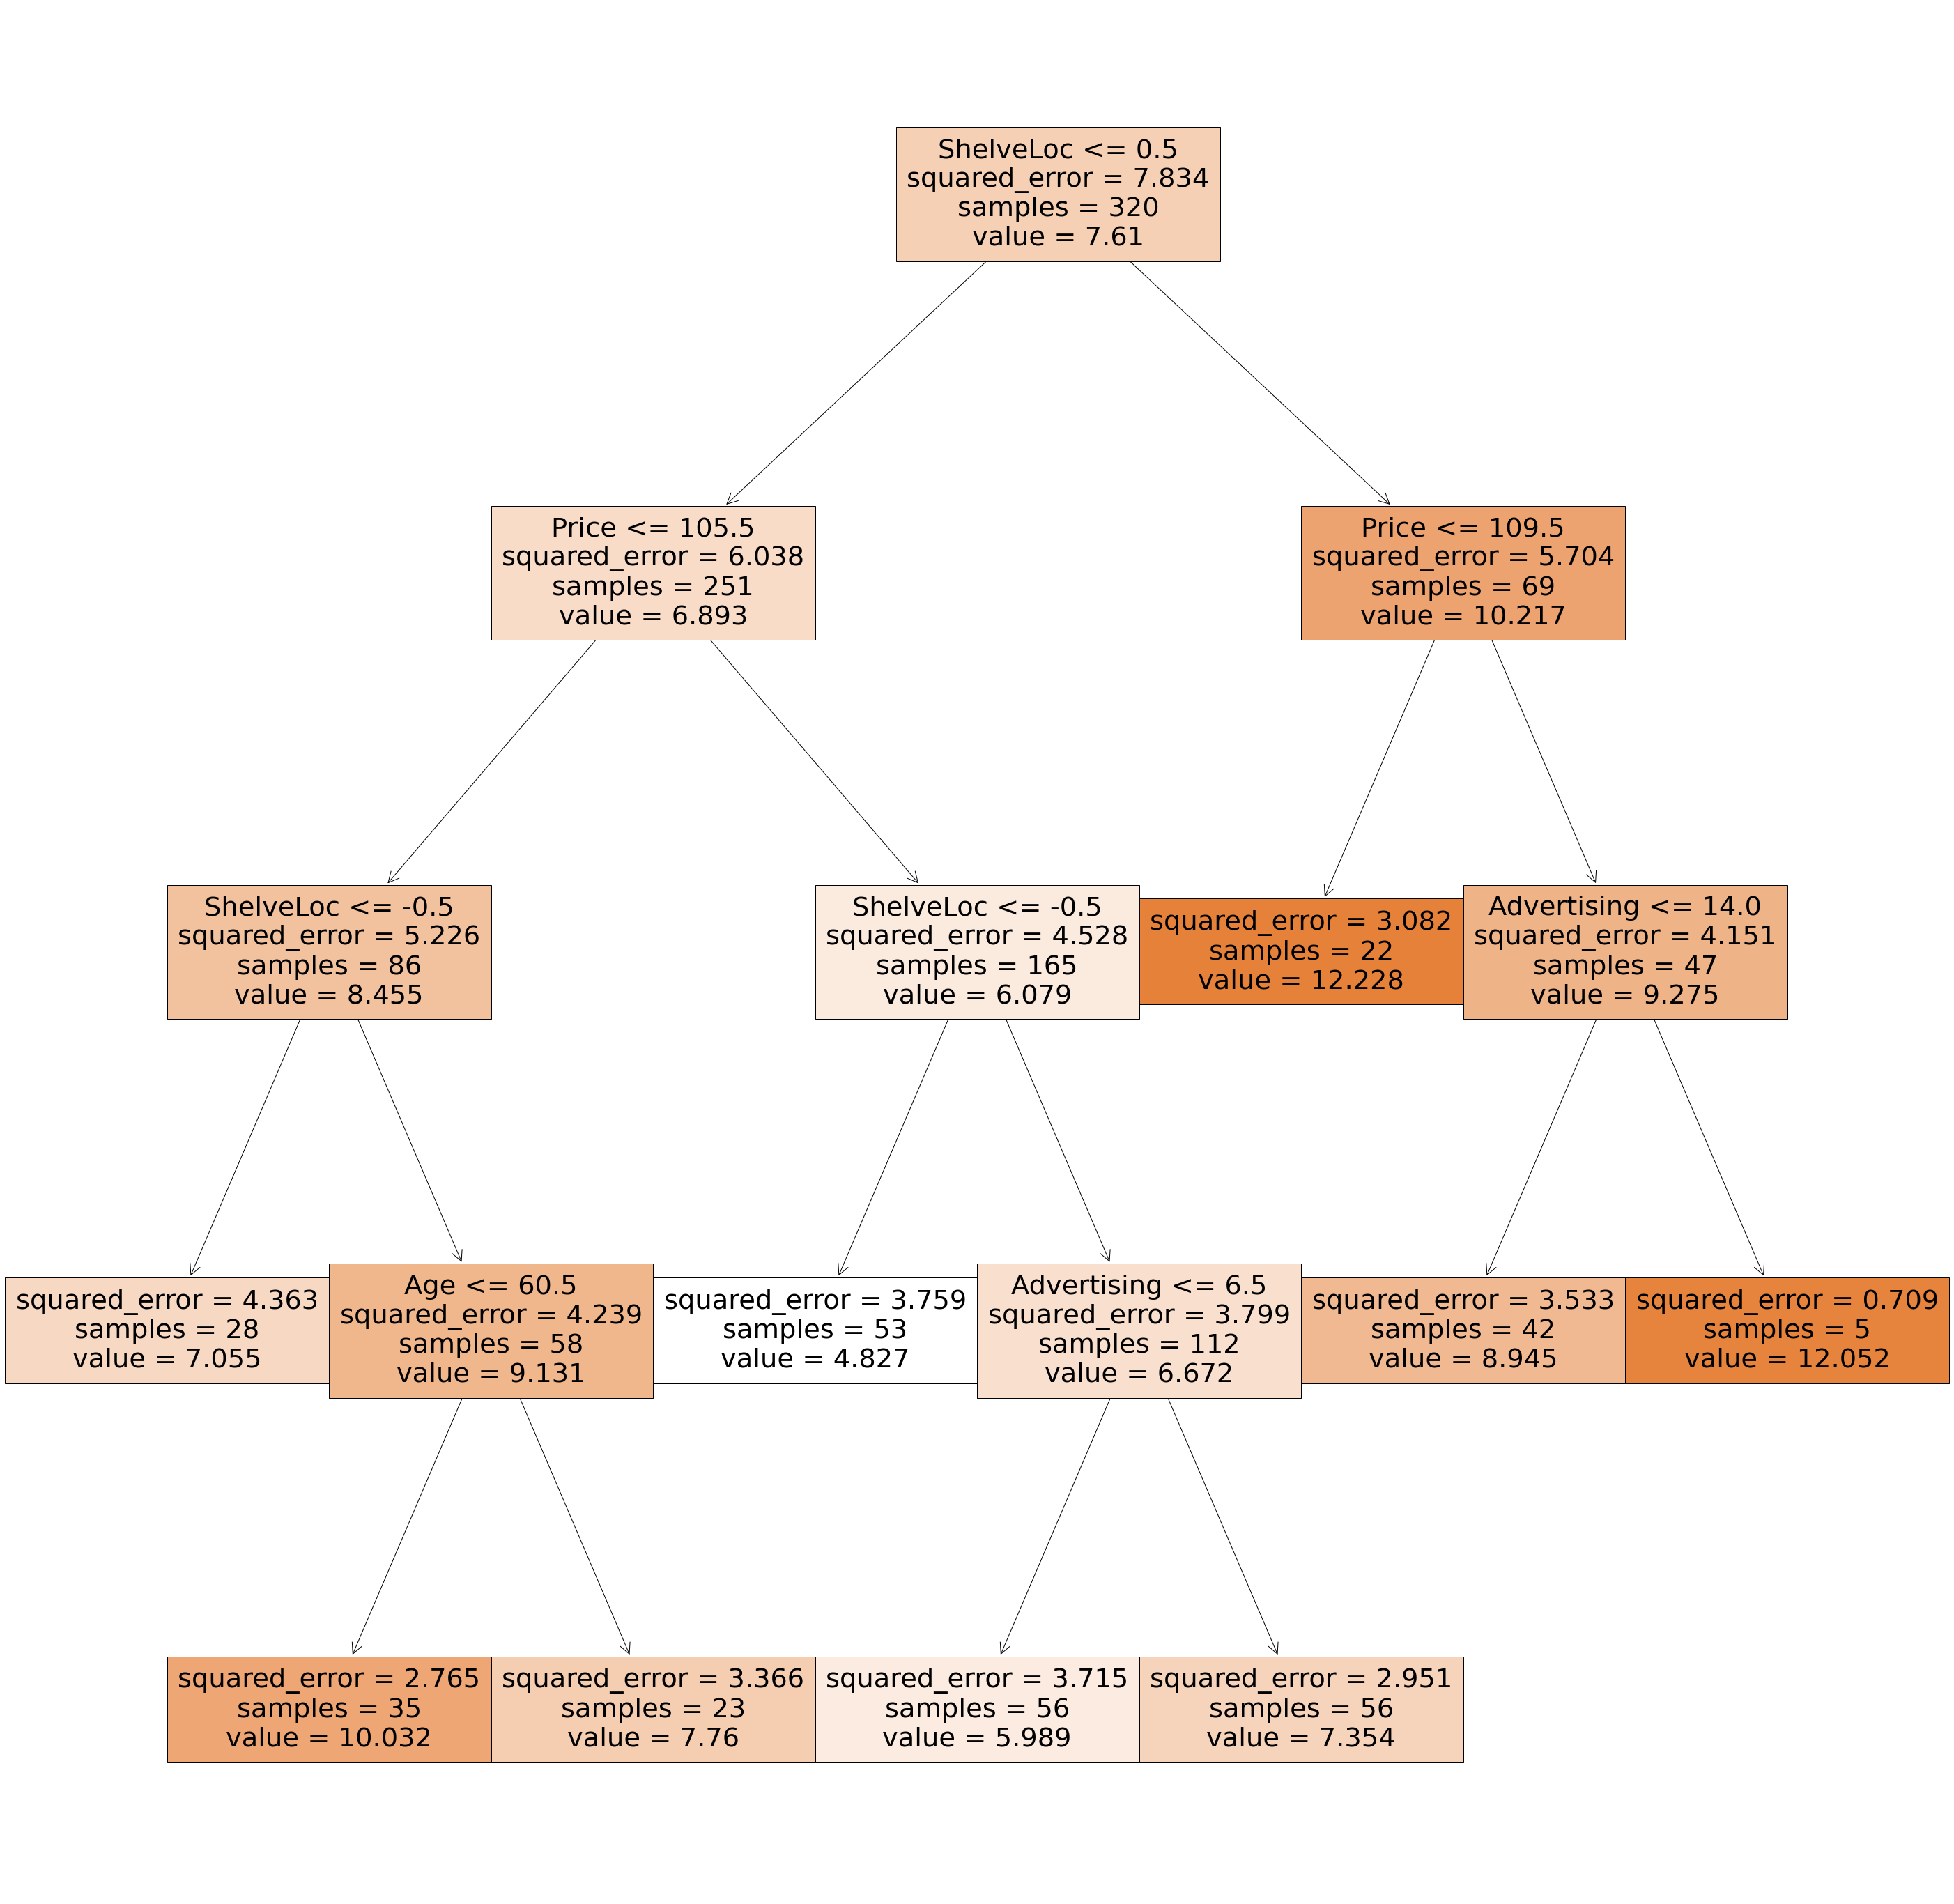

In [22]:
model=DecisionTreeRegressor( min_samples_split=10,ccp_alpha=mini_alpha)
model.fit(xx_train,yy_train)

fig = plt.figure(figsize=(50,50))
tree.plot_tree(model, feature_names=pddata.columns[2:12], class_names=pddata.columns[1], filled = True)
plt.show()

In [23]:
## Build a random forest using the command RandomForestRegressor
## from sklearn.ensemble. Choose one-fourth of the training data at
## random, and choose four of the ten available parameters in the data
## set. Print the test error.

# from sklearn.ensemble import RandomForestRegressor and then fit the 
# training data in that model and then predict the output for test data
RFR_model=RandomForestRegressor(max_samples=0.25,max_features=0.40)
RFR_model.fit(xx_train,yy_train)
y_pred=RFR_model.predict(xx_test)

# Calculating the test error using mean_squared_error from sklearn.metrics
test_error=sklearn.metrics.mean_squared_error(yy_test, y_pred)
print("Test error in Random Forest Regressor is: ",test_error)

Test error in Random Forest Regressor is:  3.530638455500001
